In [3]:
# !pip install numpy scipy matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

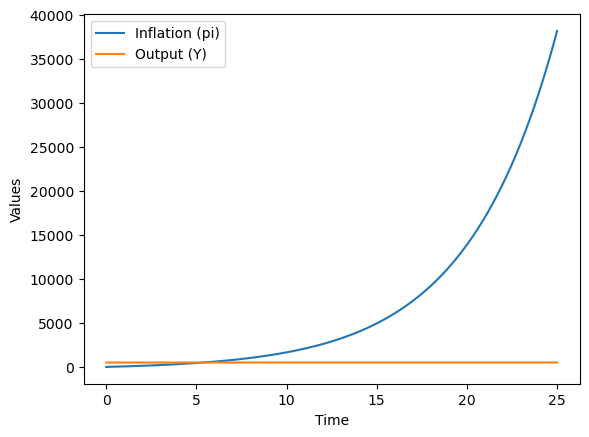

In [17]:
# Define the function representing your equation
def interest_rate_equation(y, t, zi, d1, pi_star, d2, Yn):
    pi, Y = y
    di_dt = zi + d1 * (pi - pi_star) + d2 * (Y - Yn) / Yn
    dY_dt = 0  # This is set to 0 because your equation doesn't involve Y derivatives
    return [di_dt, dY_dt]

# Set initial conditions
initial_conditions = [0.05, 500]

# Set parameters
zi =  2 # Your value for zi - sjokk
d1 = 0.2 # Your value for d1 - This is a coefficient associated with the difference between the actual inflation rate (ππ) and the target inflation rate (π∗π∗).
pi_star = 0.061 # Your value for pi_star
d2 =  0.2# Your value for d2
Yn = 2 # Your value for Yn


# Set time points for simulation
t0 = 0
t1 = 25
t = np.linspace(t0, t1, 10000)  # Adjust time range and steps as needed

# Solve the ODE system
solution = odeint(interest_rate_equation, initial_conditions, t, args=(zi, d1, pi_star, d2, Yn))

# Extract the results
pi_values, Y_values = solution[:, 0], solution[:, 1]

# Plot the results
plt.plot(t, pi_values, label='Inflation (pi)')
plt.plot(t, Y_values, label='Output (Y)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

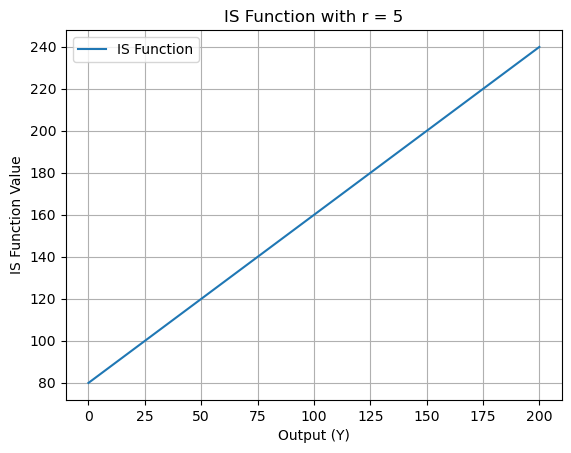

In [6]:
# Parameters
C0 = 100  # Autonomous consumption
c1 = 0.8  # Marginal propensity to consume
I0 = 50   # Autonomous investment
i1 = -20  # Marginal propensity to invest
G = 30    # Government spending
T = 0.25    # Taxes

# Define the IS function
def IS_function(Y, r):
    return C0 + c1 * (Y - T) + I0 + i1 * r + G

# Set the range of output values
Y_values = np.linspace(0, 200, 100)

# Set the interest rate
r = 5

# Calculate the corresponding values of the IS function
IS_values = IS_function(Y_values, r)

# Plot the IS function
plt.plot(Y_values, IS_values, label='IS Function')
plt.xlabel('Output (Y)')
plt.ylabel('IS Function Value')
plt.title('IS Function with r = {}'.format(r))
plt.legend()
plt.grid(True)
plt.show()

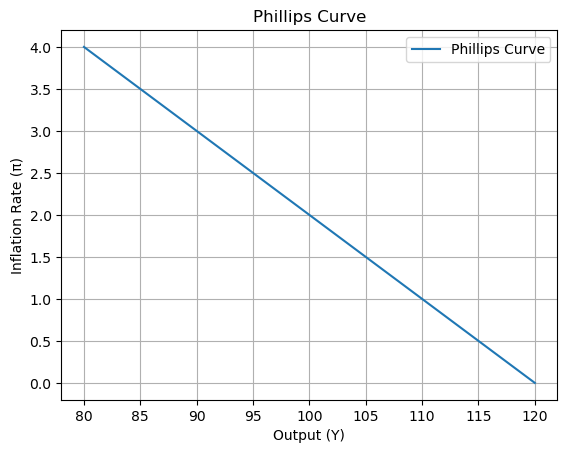

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi_e = 2       # Expected inflation rate
alpha = 0.1    # Phillips Curve parameter
Y_star = 100   # Natural level of output

# Define the Phillips Curve function
def Phillips_curve(Y, pi_e, alpha, Y_star):
    return pi_e - alpha * (Y - Y_star)

# Set the range of output values
Y_values = np.linspace(80, 120, 100)

# Calculate the corresponding values of the Phillips Curve
Phillips_values = Phillips_curve(Y_values, pi_e, alpha, Y_star)

# Plot the Phillips Curve
plt.plot(Y_values, Phillips_values, label='Phillips Curve')
plt.xlabel('Output (Y)')
plt.ylabel('Inflation Rate (π)')
plt.title('Phillips Curve')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Parameters
C0 = 100      # Autonomous consumption
c1 = 0.8      # Marginal propensity to consume
I0 = 50       # Autonomous investment
i1 = -20      # Marginal propensity to invest
G = 30        # Government spending
T = 20        # Taxes
M = 80        # Money supply
P = 1         # Price level
L0 = 80       # Autonomous money demand
L1 = 0.5      # Sensitivity of money demand to income
L2 = -10      # Sensitivity of money demand to the interest rate
pi_e = 2      # Expected inflation rate
alpha = 0.1   # Phillips Curve parameter
Y_star = 100  # Natural level of output
zi = 2        # Exogenous variable in interest rate equation
d1 = 0.5      # Coefficient in interest rate equation
pi_star = 2   # Target inflation rate in interest rate equation
d2 = -0.1     # Coefficient in interest rate equation
Yn = 100      # Potential output in interest rate equation

# Define the IS function
def IS_function(Y, r):
    return C0 + c1 * (Y - T) + I0 + i1 * r + G

# Define the Phillips Curve function
def Phillips_curve(Y, pi_e, alpha, Y_star):
    return pi_e - alpha * (Y - Y_star)

# Define the LM function
def LM_function(Y, r):
    return M/P - L0 + L1 * Y - L2 * r

# Define the system of equations for the Small Open Economy model
def SOE_model(variables):
    Y, r, pi = variables
    IS_eq = IS_function(Y, r) - Y
    Phillips_eq = Phillips_curve(Y, pi_e, alpha, Y_star) - pi
    LM_eq = LM_function(Y, r) - pi
    return [IS_eq, Phillips_eq, LM_eq]

# Initial guess for the solution
initial_guess = [100, 5, 2]

# Solve the system of equations
solution = fsolve(SOE_model, initial_guess)

# Extract the results
Y, r, pi = solution

print("Equilibrium Output (Y):", Y)
print("Equilibrium Interest Rate (r):", r)
print("Equilibrium Inflation Rate (pi):", pi)

Equilibrium Output (Y): -140.0
Equilibrium Interest Rate (r): 9.6
Equilibrium Inflation Rate (pi): 26.000000000000004


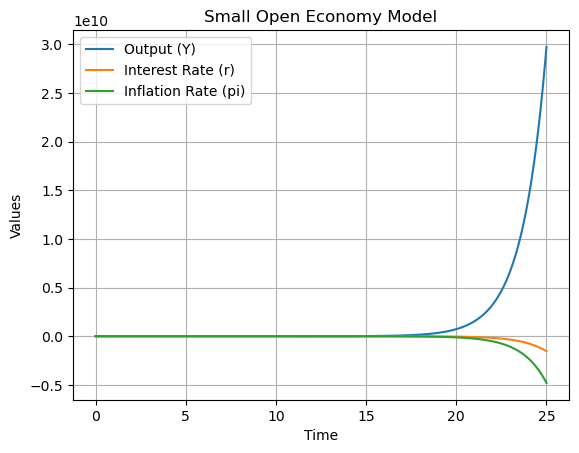

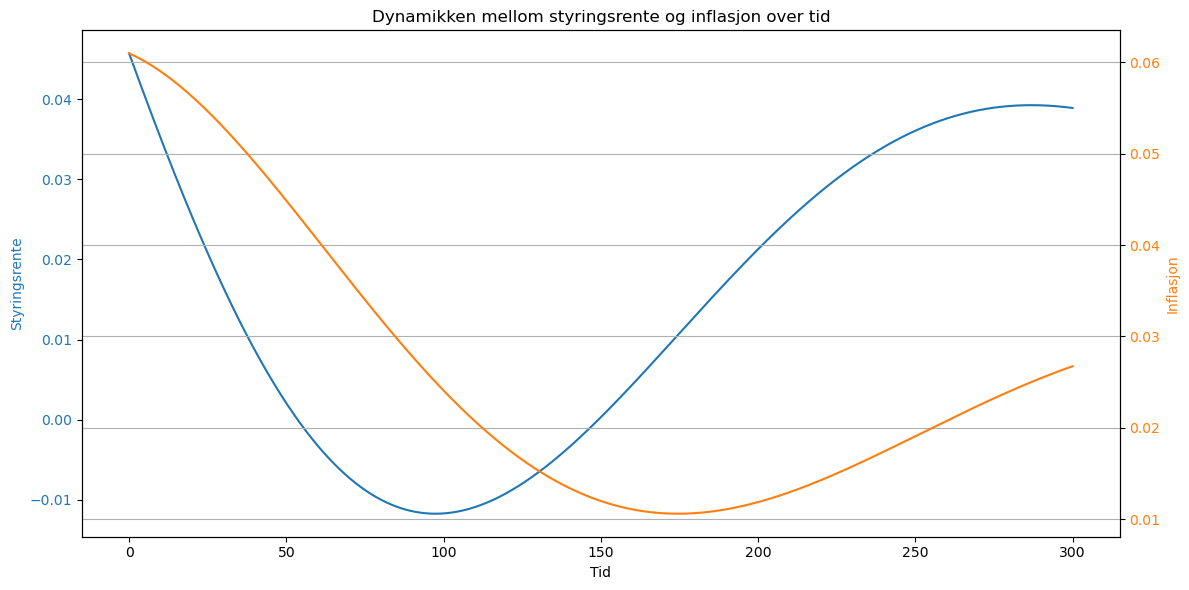